## 1. Describe Yelp data. (15)

In [67]:
import stanza
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

In [59]:
yelp = pd.read_csv("yelp_labelled.txt", sep="\t", header=None, names=["text", "class"])
yelp

,text,class
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [63]:
yelp['text'].apply(len).min()

11

In [62]:
yelp['text'].apply(len).max()

149

In [3]:
set(yelp['class'])

{0, 1}

In [60]:
yelp.shape

(1000, 2)

In [5]:
yelp.describe()

,class
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


The dataset contains some subset of Yelp reviews. There are 1000 items of (text, class) pairs in the dataset. The class can be either 0 (negative), or 1 (positive).

Zhang, Xiang, Junbo Zhao, and Yann LeCun. "Character-level convolutional networks for text
classification." Advances in neural information processing systems 28 (2015).

## 2. Process SentiWord data, describe the result.

Mind difference in labeling:

<b>sentences:</b> 0 – negative, 1 – positive;

<b>words:</b> continuous scores from the range [-1, 1]

Gatti, L., Guerini, M., & Turchi, M. (2015). SentiWords: Deriving a high precision and high coverage
lexicon for sentiment analysis. IEEE Transactions on Affective Computing, 7(4), 409-421.

In [65]:
df_sentiword = pd.read_csv("SentiWords_1.1.txt", sep="\t", header=None, names=["text", "polarity"], skiprows=26)
df_sentiword

,text,polarity
0,.22_caliber#a,0.00000
1,.22_calibre#a,0.00000
2,.22-caliber#a,0.00000
3,.22-calibre#a,0.00000
4,.22#n,0.12208
...,...,...
155282,zymolytic#a,-0.19821
155283,zymosis#n,0.15754
155284,zymotic#a,-0.08847
155285,zymurgy#n,0.00000


In [66]:
df_sentiword[['lemma', 'PoS']] = df_sentiword['text'].str.split('#', expand=True)
df_sentiword = df_sentiword[['lemma', 'PoS', 'polarity']].astype({'polarity': float})

df_sentiword.head()

,lemma,PoS,polarity
0,.22_caliber,a,0.00000
1,.22_calibre,a,0.00000
2,.22-caliber,a,0.00000
3,.22-calibre,a,0.00000
4,.22,n,0.12208


In [7]:
max(df_sentiword['polarity'])

0.89489

In [8]:
min(df_sentiword['polarity'])

-0.93489

In [9]:
sentiword_dict = {
    f"{lemma}#{pos}": i
    for i, (lemma, pos) in enumerate(zip(df_sentiword['lemma'], df_sentiword['PoS']))
}

In [10]:
df_sentiword.shape

(155287, 3)

In [11]:
df_sentiword.describe()

,polarity
count,155287.000000
mean,-0.009101
std,0.128313
min,-0.934890
25%,0.000000
50%,0.000000
75%,0.000000
max,0.894890


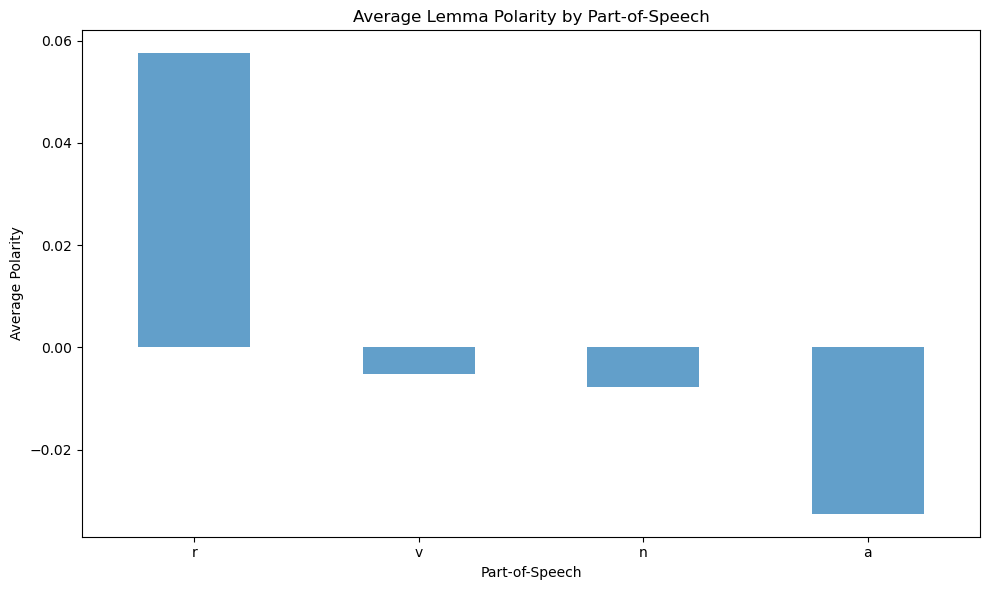

In [12]:
# Group the DataFrame by 'PoS' and calculate the mean polarity for each 'PoS'
pos_polarity = df_sentiword.groupby('PoS')['polarity'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
pos_polarity.plot(kind='bar', alpha=0.7)

# Customize the bar chart
plt.title('Average Lemma Polarity by Part-of-Speech')
plt.xlabel('Part-of-Speech')
plt.ylabel('Average Polarity')
plt.xticks(rotation=0)

# Show the bar chart
plt.tight_layout()
plt.show()


In [13]:
def analyze_polarity_by_pos(df, pos_tag):
    pos_filter = df['PoS'] == pos_tag
    filtered_df = df[pos_filter]

    polarities = filtered_df['polarity']
    positive = polarities[polarities > 0]
    negative = polarities[polarities < 0]
    neutral = polarities[polarities == 0]

    stats = {
        'Positive': len(positive),
        'Negative': len(negative),
        'Neutral': len(neutral),
        'Average': np.average(polarities),
        'Variance': np.var(polarities),
        'Standard deviation': np.std(polarities),
        'Total': len(polarities),
    }

    print(f'{pos_tag.capitalize()} properties:')
    for stat_name, stat_value in stats.items():
        print(f'Number of {stat_name.lower()}: {stat_value}')
    print()


# Analyze polarities for nouns, adjectives, verbs, and adverbs
analyze_polarity_by_pos(df_sentiword, 'n')
analyze_polarity_by_pos(df_sentiword, 'a')
analyze_polarity_by_pos(df_sentiword, 'v')
analyze_polarity_by_pos(df_sentiword, 'r')


N properties:
Number of positive: 9271
Number of negative: 12393
Number of neutral: 96134
Number of average: -0.007742838588091478
Number of variance: 0.010221515249068818
Number of standard deviation: 0.10110150962804076
Number of total: 117798

A properties:
Number of positive: 5322
Number of negative: 7325
Number of neutral: 8832
Number of average: -0.032539501839005544
Number of variance: 0.04374603593623428
Number of standard deviation: 0.20915553049401844
Number of total: 21479

V properties:
Number of positive: 2299
Number of negative: 2278
Number of neutral: 6952
Number of average: -0.005207508890623645
Number of variance: 0.026626910594054018
Number of standard deviation: 0.16317754316710992
Number of total: 11529

R properties:
Number of positive: 2201
Number of negative: 513
Number of neutral: 1767
Number of average: 0.05753568399910735
Number of variance: 0.016493137284430408
Number of standard deviation: 0.12842560992430757
Number of total: 4481



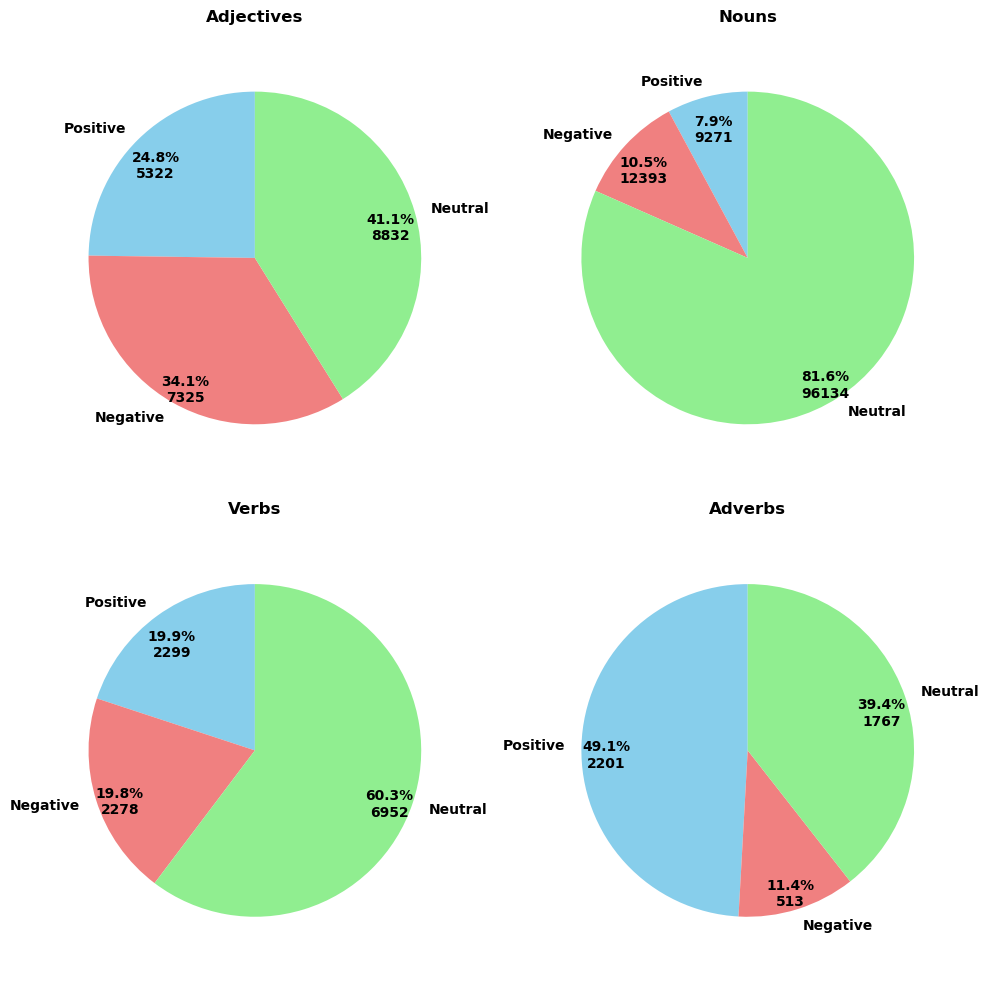

In [14]:
# Define the data
categories = ['Positive', 'Negative', 'Neutral']
adjectives = [0, 0, 0]
adverbs = [0, 0, 0]
nouns = [0, 0, 0]
verbs = [0, 0, 0]

for x in df_sentiword[df_sentiword['PoS'] == 'n']['polarity']:
    if x > 0: nouns[0] += 1
    elif x < 0: nouns[1] += 1
    else: nouns[2] += 1

for x in df_sentiword[df_sentiword['PoS'] == 'a']['polarity']:
    if x > 0: adjectives[0] += 1
    elif x < 0: adjectives[1] += 1
    else: adjectives[2] += 1
        
for x in df_sentiword[df_sentiword['PoS'] == 'v']['polarity']:
    if x > 0: verbs[0] += 1
    elif x < 0: verbs[1] += 1
    else: verbs[2] += 1
        
for x in df_sentiword[df_sentiword['PoS'] == 'r']['polarity']:
    if x > 0: adverbs[0] += 1
    elif x < 0: adverbs[1] += 1
    else: adverbs[2] += 1

# Create a 2x2 grid of pie charts
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Create a function to add data and labels to the pie chart
def add_pie_chart(ax, data, labels, title):
    wedges, texts, autotexts = ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'], pctdistance=0.85, textprops={'fontweight': 'bold'})
    ax.axis('equal')
    ax.set_title(title, fontweight='bold', fontsize=12)
    
    for i, p in enumerate(wedges):
        count = data[i]
        angle = (p.theta2 - p.theta1) / 2.0 + p.theta1
        x = 0.85 * p.r * np.cos(np.deg2rad(angle))
        y = 0.85 * p.r * np.sin(np.deg2rad(angle))
        text = ax.text(x, y, f'\n\n{count}', ha='center', va='center', fontsize=10, fontweight='bold')

# Add data to the pie charts for each part of speech
add_pie_chart(axs[0, 0], adjectives, categories, 'Adjectives')
add_pie_chart(axs[0, 1], nouns, categories, 'Adjectives')
add_pie_chart(axs[1, 0], verbs, categories, 'Verbs')
add_pie_chart(axs[1, 1], adverbs, categories, 'Adverbs')

# Adjust spacing
plt.tight_layout()

# Display the 2x2 grid of pie charts
plt.show()

## Sentiment analysis

In [15]:
def create_stanza_pipeline(language='en', processors='tokenize,pos,lemma', download_method="reuse_resources"):
    pipeline = stanza.Pipeline(lang=language, processors=processors, download_method=download_method)
    return pipeline

nlp = create_stanza_pipeline()

2023-09-21 18:53:35 INFO: Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

2023-09-21 18:53:35 INFO: Using device: cpu
2023-09-21 18:53:35 INFO: Loading: tokenize
2023-09-21 18:53:35 INFO: Loading: pos
2023-09-21 18:53:35 INFO: Loading: lemma
2023-09-21 18:53:35 INFO: Done loading processors!


In [16]:
def lemmatize_stanza(txt):
    doc = nlp(txt)
    lemmatized = {word.lemma: pos_mapping.get(word.pos, word.pos) for sentence in doc.sentences 
                  for word in sentence.words if word.pos not in ['PUNCT', 'SCONJ', 'DET', 'ADP', 'INTJ', 'CCONJ', 'NUM', 'PART', 'SYM', 'X']}
    return lemmatized


pos_mapping = {
    'AUX': 'v',
    'NOUN': 'n',
    'PRON': 'n',
    'ADV': 'r',
    'VERB': 'v',
    'ADJ': 'a',
    'PROPN': 'n',
}


lemmatize_stanza("Develop a lexicon-based sentiment classifier using Stanza for lemmatization and POS-tagging.(Mind difference in labeling: sentences: 0 – negative, 1 – positive; words: continuous scores from the range [-1, 1]. Note that SentiWords and Stanza use different POS tag sets.) (35)")

{'develop': 'v',
 'lexicon': 'n',
 'base': 'v',
 'sentiment': 'n',
 'classifier': 'n',
 'use': 'v',
 'Stanza': 'n',
 'lemmatization': 'n',
 'pos': 'n',
 'tagging': 'n',
 'mind': 'n',
 'difference': 'n',
 'labeling': 'n',
 'sentence': 'n',
 'negative': 'a',
 'positive': 'a',
 'word': 'n',
 'continuous': 'a',
 'score': 'n',
 'range': 'n',
 'note': 'v',
 'SentiWords': 'n',
 'different': 'a',
 'tag': 'n',
 'set': 'n'}

In [29]:
def sentiwords_score(lemmatized):
    scores = []
    for key, value in lemmatized.items():
        if value in ('n', 'v', 'r', 'a'):
            if key + '#' + value in sentiword_dict:
                score = df_sentiword['polarity'][sentiword_dict[key + '#' + value]]
                scores.append(score)
            else:
                scores.append(0)
        else:
            scores.append(0)
        
    return 0 if np.average(scores) < 0 else 1

In [51]:
def sentiwords_score(lemmatized):
    scores = [df_sentiword['polarity'][sentiword_dict[key + '#' + value]] for key, value in lemmatized.items() if value in ('n', 'v', 'r', 'a') and key + '#' + value in sentiword_dict]
    return int(np.average(scores) >= 0)

In [56]:
sentiwords_score(lemmatize_stanza("Develop a lexicon-based sentiment classifier using Stanza for lemmatization and POS-tagging.(Mind difference in labeling: sentences: 0 – negative, 1 – positive; words: continuous scores from the range [-1, 1]. Note that SentiWords and Stanza use different POS tag sets.) (35)"))

1

In [74]:
yelp['polarity'] = yelp['text'].apply(lambda text: sentiwords_score(lemmatize_stanza(text)))
yelp

/Users/azamatshora/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)


,text,class,polarity
0,Wow... Loved this place.,1,1
1,Crust is not good.,0,1
2,Not tasty and the texture was just nasty.,0,1
3,Stopped by during the late May bank holiday of...,1,1
4,The selection on the menu was great and so wer...,1,1
...,...,...,...
995,I think food should have flavor and texture an...,0,1
996,Appetite instantly gone.,0,0
997,Overall I was not impressed and would not go b...,0,1
998,"The whole experience was underwhelming, and I ...",0,1


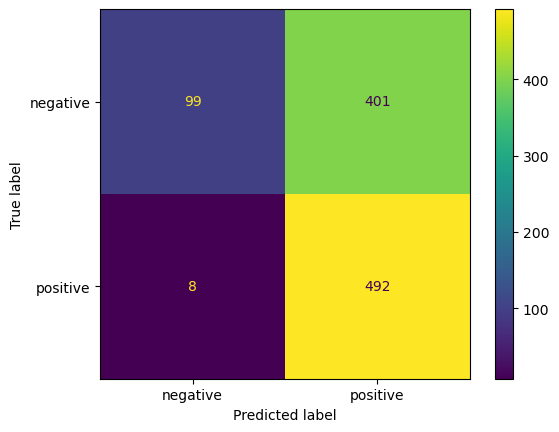

In [75]:
conf_matrix = confusion_matrix(yelp['class'], yelp['polarity'])
plot = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['negative', 'positive'])
plot.plot()
plt.show()

In [80]:
# Calculate F1-scores for both negative and positive classes
f1_scores = f1_score(yelp['class'], yelp['polarity'], average=None)

# Print the F1-scores
print(f"F1-Score (Negative): {f1_scores[0]}")
print(f"F1-Score (Positive): {f1_scores[1]}")

F1-Score (Negative): 0.32619439868204286
F1-Score (Positive): 0.7063890882986361


In [81]:
nlp = create_stanza_pipeline(language='en', processors='tokenize,sentiment', download_method="reuse_resources")

2023-09-21 20:53:36 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

2023-09-21 20:53:36 INFO: Using device: cpu
2023-09-21 20:53:36 INFO: Loading: tokenize
2023-09-21 20:53:36 INFO: Loading: sentiment
2023-09-21 20:53:37 INFO: Done loading processors!


In [82]:
yelp['stanza_polarity'] = yelp['text'].apply(lambda item: 1 if np.average([sentence.sentiment for sentence in nlp(item).sentences]) > 1 else 0)

yelp

,text,class,polarity,stanza_polarity
0,Wow... Loved this place.,1,1,1
1,Crust is not good.,0,1,0
2,Not tasty and the texture was just nasty.,0,1,0
3,Stopped by during the late May bank holiday of...,1,1,1
4,The selection on the menu was great and so wer...,1,1,1
...,...,...,...,...
995,I think food should have flavor and texture an...,0,1,0
996,Appetite instantly gone.,0,0,0
997,Overall I was not impressed and would not go b...,0,1,0
998,"The whole experience was underwhelming, and I ...",0,1,0


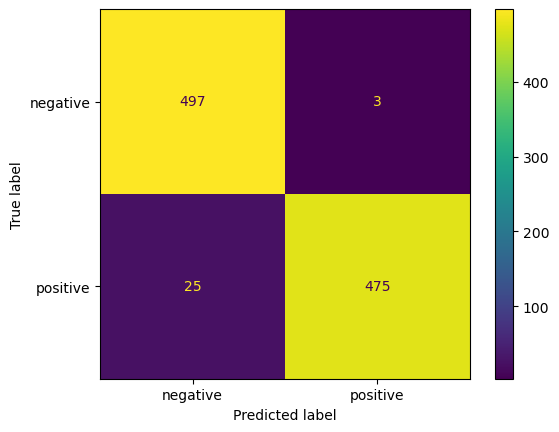

In [100]:
conf_matrix = confusion_matrix(yelp['class'], yelp['stanza_polarity'])

# Create and display the confusion matrix plot with custom colors
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['negative', 'positive']).plot()
plt.show()

In [85]:
# Calculate F1-scores for both negative and positive classes
f1_scores = f1_score(yelp['class'], yelp['stanza_polarity'], average=None)

# Print the F1-scores
print(f"F1-Score (Negative): {f1_scores[0]}")
print(f"F1-Score (Positive): {f1_scores[1]}")

F1-Score (Negative): 0.9726027397260274
F1-Score (Positive): 0.9713701431492843
